In [1]:
%matplotlib inline
import numpy as np
import numpy.random as random
import math as math
import matplotlib.pyplot as plt
import scipy.linalg as splin
from mpl_toolkits.mplot3d import proj3d
from mpl_toolkits.mplot3d import Axes3D
import copy as copy
import math
import pickle
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
import datetime
import sys
sys.path.insert(0,'/usr/local/lib/python3.5/dist-packages/')
from joblib import Parallel, delayed

In [2]:
def saveThing(thing,file):
    with open(file,'wb') as fil:
        pick = pickle.Pickler(fil,protocol=4)
        pick.dump(thing)
        pick.clear_memo()
def openThing(file):
    with open(file,'rb') as fil:
        pick = pickle.Unpickler(fil)
        thing = pick.load()
    return thing

1D Vandermonde

In [3]:
def trianglePlot(arry,clist,emphPoints = [],dim=2,title=''):
    
    ranges = [arry[:,idx].max()-arry[:,idx].min() for idx in range(dim+1)]
    axesDist = 0.6*max(ranges)
    
    figs,axs = plt.subplots(nrows=dim,ncols=dim,figsize=(15,15))
    plt.suptitle(title)
    for row in range(dim-1,-1,-1):
        for col in range(dim-1,-1,-1):
            if col >= row:
                py = arry[:,row]
                px = arry[:,col+1]
                
                centerX = (px.max()+px.min())/2
                centerY = (py.max()+py.min())/2
                
                sc1 = axs[row,col].scatter(px,py,s=5,c=clist,edgecolor='black',linewidth=0.2, cmap='plasma')
                for p in emphPoints:
                    axs[row,col].scatter([px[0]],[py[0]],s=100,c='C1',edgecolor='black',linewidth=0.2)
                
                axs[row,col].set_xlim([centerX-axesDist,centerX+axesDist])
                axs[row,col].set_ylim([centerY-axesDist,centerY+axesDist])
                if row != col:
                    axs[row,col].set_xticks([])
                    axs[row,col].set_yticks([])
                if row == col:
                    axs[row,col].set_ylabel('dir '+str(row+1))
                    axs[row,col].set_xlabel('dir '+str(col+2))
                axs[row,col].ticklabel_format(style='sci',scilimits=(-2,2),axis='both')
            else:
                axs[row,col].axis('off')
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.show()
    
def trianglePlotBound(arry,clist,radii,radius,emphPoints = [],dim=2,title=''):
    
    axesDist = 1.05*radius*radii[0]
    
    theta = np.linspace(0, 2 * np.pi, 100)
    perim = np.array([radius*np.cos(theta),radius*np.sin(theta)])
    
    figs,axs = plt.subplots(nrows=dim,ncols=dim,figsize=(15,15))
    plt.suptitle(title)
    for row in range(dim-1,-1,-1):
        for col in range(dim-1,-1,-1):
            if col >= row:
                py = arry[:,row]
                px = arry[:,col+1]
                
                ellipse = np.dot(np.diag([radii[col+1],radii[row]]),perim)
                
                centerX = (px.max()+px.min())/2
                centerY = (py.max()+py.min())/2
                
                sc1 = axs[row,col].scatter(px,py,s=1,c=clist,edgecolor='black',linewidth=0.1, cmap='plasma')
                sc2 = axs[row,col].plot(ellipse[0],ellipse[1],c='C0')
                for p in emphPoints:
                    axs[row,col].scatter([px[0]],[py[0]],s=100,c='C1',edgecolor='black',linewidth=0.2)
                
                axs[row,col].set_xlim([-axesDist,axesDist])
                axs[row,col].set_ylim([-axesDist,axesDist])
                if row != col:
                    axs[row,col].set_xticks([])
                    axs[row,col].set_yticks([])
                if row == col:
                    axs[row,col].set_ylabel('dir '+str(row+1))
                    axs[row,col].set_xlabel('dir '+str(col+2))
                axs[row,col].ticklabel_format(style='sci',scilimits=(-2,2),axis='both')
            else:
                axs[row,col].axis('off')
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.show()

In [4]:
def singularVals1D(xList,thetaList):
    J = []
    for lam,A in thetaList:
        J.append([np.exp(-lam*x) for x in xList])
        J.append([-A*x*np.exp(-lam*x) for x in xList])
    J = np.array(J).T
    u,s,vt = np.linalg.svd(J)
    return J,s

def evalPoints(xList,thetaList):
    return [sum([A*np.exp(-lam*x) for lam,A in thetaList]) for x in xList]

def RMat(thetaList,nMax):
    R = []
    for lam,A in thetaList:
        R.append([(-lam)**n/math.factorial(n) for n in range(nMax)])
        R.append([-n*A*(-lam)**(n-1)/math.factorial(n) for n in range(nMax)])
    return np.array(R).T

In [5]:
def findCovEntry(points,avgs,i,j,k,l):
    return sum([(p[i][j] - avgs[i][j])*(p[k][l] - avgs[k][l]) for p in points])/(len(points)-1)

In [6]:
nX = 21
xList = np.linspace(0,1,nX)
nParams = 10
ARange = 10
lambdaRange = 10
sampledPoints0 = []
eigList0 = []
iterations = 10
for idx in range(iterations):
    thetaList = np.array([[lambdaRange*np.random.random(),ARange*np.random.random()] for x in range(nParams)])
    #thetaList = np.array([[lambdaRange*np.random.random(),1] for x in range(nParams)])
    J,s = singularVals1D(xList,thetaList)
    pointDict = {'thetaList':thetaList, 'xList':xList, 'R':RMat(thetaList,50), 'J':J, 's':s}
    sampledPoints0.append(pointDict)
    eigList0.extend(list(s**2))

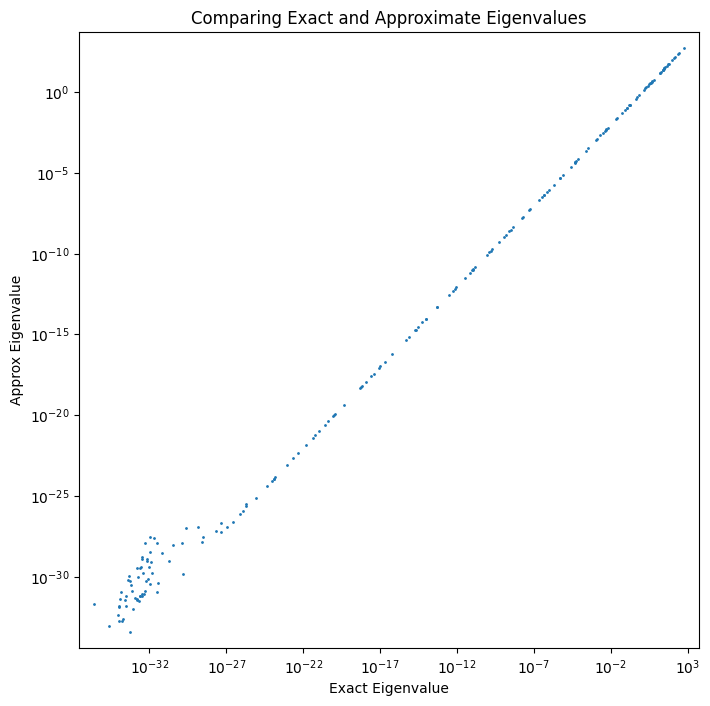

AttributeError: 'Rectangle' object has no property 'normed'

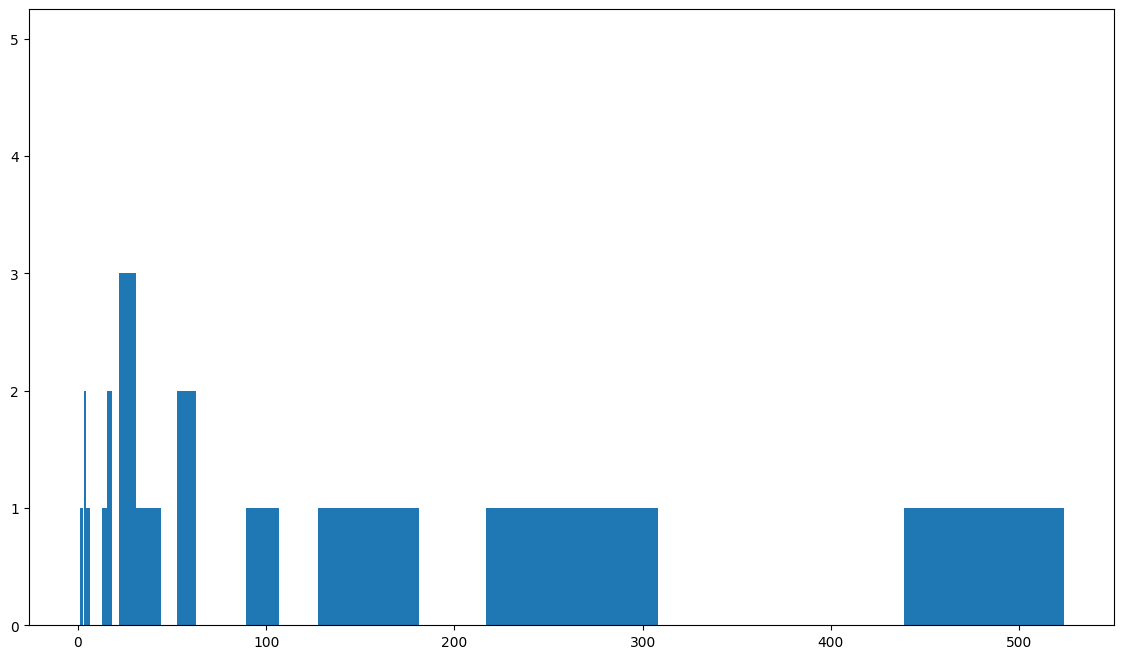

In [7]:
approxEigs = []

xList = sampledPoints0[0]['xList']
nMax = len(sampledPoints0[0]['R'])
V = np.array([[x**n for n in range(nMax)] for x in xList])

for p in sampledPoints0:
    JApprox = np.dot(V,p['R'])
    u,s,vt = np.linalg.svd(JApprox)
    p.update({'s_Approx':s, 'J_Approx':JApprox})
    approxEigs.extend(list(s**2))
    
plt.figure(figsize=(8,8))
plt.scatter(eigList0,approxEigs,s=1)
plt.xlim(min(eigList0)/10,max(eigList0)*10)
plt.ylim(min(approxEigs)/10,max(approxEigs)*10)
plt.xscale('log')
plt.yscale('log')
plt.title('Comparing Exact and Approximate Eigenvalues')
plt.xlabel('Exact Eigenvalue')
plt.ylabel('Approx Eigenvalue')
plt.show()

plt.figure(figsize=(14,8))

nBins = 500
bins = np.linspace(np.log(min(eigList0)),np.log(max(eigList0)),nBins)
bins = np.exp(bins)
n, bins, patches = plt.hist(eigList0,bins=bins,normed=1,alpha=0.7,label='Jacobians with 10 points (n = '+str(len(eigList0))+')')

nBins = 500
bins = np.linspace(np.log(min(approxEigs)),np.log(max(approxEigs)),nBins)
bins = np.exp(bins)
n, bins, patches = plt.hist(approxEigs,bins=bins,normed=1,alpha=0.7,label='Approximated Jacobians')

plt.title('Shuffled Eig Vals with xList = '+str(xList))
plt.xscale('log')
plt.yscale('log')

plt.legend()

plt.show()

In [103]:
ratios = []
ratios_approx = []
ommitted_ratios = 0
ommitted_approx = 0
for p in sampledPoints0:
    s1 = p['s']
    for i in range(len(s1)-1):
        if s1[i]**2 > 10**(-19):
            ratios.append((s1[i]/s1[i+1])**2)
        else:
            ommitted_ratios += 1
    s2 = p['s_Approx']
    for i in range(len(s2)-1):
        if s2[i]**2 > 10**(-19):
            ratios_approx.append((s2[i]/s2[i+1])**2)
        else:
            ommitted_approx += 1

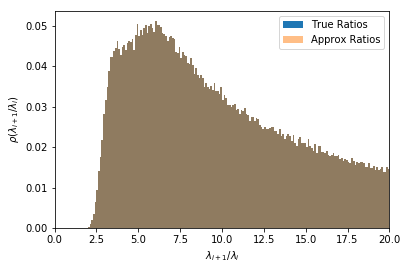

In [107]:
bins = np.linspace(0,100,1000)
n,bins,patches = plt.hist(ratios,bins=bins,normed=True,label='True Ratios')
n,bins,patches = plt.hist(ratios_approx,bins=bins,normed=True,label='Approx Ratios',alpha=0.5)
plt.xlim([0,20])
plt.xlabel(r'$\lambda_{i+1}/\lambda_i$')
plt.ylabel(r'$\rho(\lambda_{i+1}/\lambda_i)$')
plt.legend()
plt.show()

In [ ]:
(iMax,jMax) = sampledPoints0[0]['J'].shape

Jacobs = [p['J'] for p in sampledPoints0]

MuJ = [[sum([J1[i][j] for J1 in Jacobs])/len(Jacobs) for j in range(jMax)] for i in range(iMax)]
MuJ_Vect = [MuJ[i][j] for j in range(jMax) for i in range(iMax)]

CovJIDX = np.array([(i,j,k,l) for l in range(jMax) for k in range(iMax) for j in range(jMax) for i in range(iMax)])

CovJ_flat = Parallel(n_jobs=14)(delayed(findCovEntry)(Jacobs,MuJ,i,j,k,l) for (i,j,k,l) in CovJIDX)


In [63]:
CovJ = np.array([[[[0.0 for l in range(jMax)] for k in range(iMax)] for j in range(jMax)] for i in range(iMax)])
for idx in range(len(CovJIDX)):
    (i,j,k,l) = CovJIDX[idx]
    CovJ[i][j][k][l] = CovJ_flat[idx]
    
CovJ_Mat = [[CovJ[i][j][k][l] for l in range(jMax) for k in range(iMax)] for j in range(jMax) for i in range(iMax)]

JIDX = [(i,j) for j in range(jMax) for i in range(iMax)]

In [119]:
eigs_RandomJ = []
randomJ_ratios = []

for iteration in range(len(sampledPoints0)):
    JTemp_Flat = np.random.multivariate_normal(MuJ_Vect,CovJ_Mat)
    J_Temp = [[0.0 for j in range(jMax)] for i in range(iMax)]

    for idx in range(len(JIDX)):
        (i,j) = JIDX[idx]
        J_Temp[i][j] = JTemp_Flat[idx]
        
    u,s,vt = np.linalg.svd(J_Temp)
    
    for i in range(len(s)-1):
        if s[i+1]**2 > 10**(-19):
            randomJ_ratios.append((s[i]/s[i+1])**2)
    
    eigs_RandomJ.append(list(s**2))

/home/katherine/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: RuntimeWarning: covariance is not positive-semidefinite.


KeyboardInterrupt: 

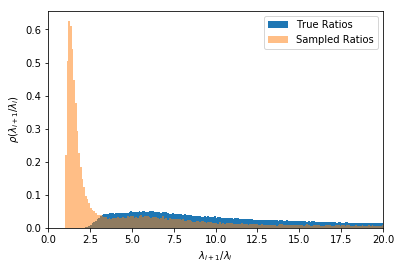

In [120]:
bins = np.linspace(0,100,1000)
n,bins,patches = plt.hist(ratios,bins=bins,normed=True,label='True Ratios')
n,bins,patches = plt.hist(randomJ_ratios,bins=bins,normed=True,label='Sampled Ratios',alpha=0.5)
plt.xlim([0,20])
plt.xlabel(r'$\lambda_{i+1}/\lambda_i$')
plt.ylabel(r'$\rho(\lambda_{i+1}/\lambda_i)$')
plt.legend()
plt.show()

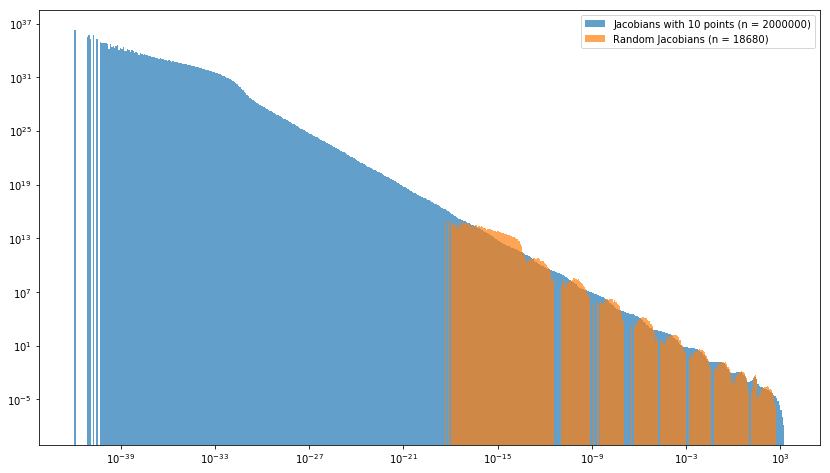

In [65]:
plt.figure(figsize=(14,8))

nBins = 500
bins = np.linspace(np.log(min(eigList0)),np.log(max(eigList0)),nBins)
bins = np.exp(bins)
n, bins, patches = plt.hist(eigList0,bins=bins,normed=1,alpha=0.7,label='Jacobians with 10 points (n = '+str(len(eigList0))+')')

nBins = 500
bins = np.linspace(np.log(min(eigs_RandomJ)),np.log(max(eigs_RandomJ)),nBins)
bins = np.exp(bins)
n, bins, patches = plt.hist(eigs_RandomJ,bins=bins,normed=1,alpha=0.7,label='Random Jacobians (n = '+str(len(eigs_RandomJ))+')')

plt.xscale('log')
plt.yscale('log')

plt.legend()

plt.show()

In [121]:
(nMax,pMax) = sampledPoints0[0]['R'].shape

RMats = [copy.deepcopy(p['R']) for p in sampledPoints0]

MuR = [[sum([R[n][p] for R in RMats])/len(RMats) for p in range(pMax)] for n in range(nMax)]
MuR_Vect = [MuR[n][p] for p in range(pMax) for n in range(nMax)]

CovRIDX = np.array([(n1,p1,n2,p2) for p2 in range(pMax) for n2 in range(nMax) for p1 in range(pMax) for n1 in range(nMax)])

CovR_flat = Parallel(n_jobs=10)(delayed(findCovEntry)(RMats,MuR,n1,p1,n2,p2) for (n1,p1,n2,p2) in CovRIDX)

Process ForkPoolWorker-150:
Process ForkPoolWorker-148:
Process ForkPoolWorker-147:
Process ForkPoolWorker-144:
Process ForkPoolWorker-146:
Process ForkPoolWorker-142:
Process ForkPoolWorker-145:
Process ForkPoolWorker-141:
Traceback (most recent call last):
Process ForkPoolWorker-149:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/katherine/anaconda3/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/katherine/anaconda3/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/home/katherine/anaconda3/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/katherine/anaconda3/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/home/katherine/anaconda3/lib/p

TypeError: catching classes that do not inherit from BaseException is not allowed

In [ ]:
CovR = np.array([[[[0.0 for p2 in range(pMax)] for n2 in range(nMax)] for p1 in range(pMax)] for n1 in range(nMax)])
for idx in range(len(CovRIDX)):
    (n1,p1,n2,p2) = CovRIDX[idx]
    CovR[n1][p1][n2][p2] = CovR_flat[idx]
    
CovR_Mat = [[CovR[n1][p1][n2][p2] for p2 in range(pMax) for n2 in range(nMax)] for p2 in range(pMax) for n1 in range(nMax)]

RIDX = [(n,p) for p in range(pMax) for n in range(nMax)]

V = np.array([[x**n for n in range(nMax)] for x in xList])

In [ ]:
eigs_RandomR = []

for iteration in range(len(sampledPoints0)):
    RTemp_Flat = np.random.multivariate_normal(MuR_Vect,CovR_Mat)
    R_Temp = [[0.0 for p in range(pMax)] for n in range(nMax)]

    for idx in range(len(RIDX)):
        (n,p) = RIDX[idx]
        R_Temp[n][p] = RTemp_Flat[idx]
        
    for n in range(nMax):
        for p in range(pMax):
            R_Temp[n][p] = R_Temp[n][p]/math.factorial(n)
        
    J_Temp = np.dot(V,R_Temp)
        
    u,s,vt = np.linalg.svd(J_Temp)
    eigs_RandomR.extend(list(s**2))

In [ ]:
eigs_RandomR_diag = []

CovR_MatDiag = np.diag([CovR_Mat[i][i] for i in range(len(CovR_Mat))])

for iteration in range(len(sampledPoints0)):
    RTemp_Flat = np.random.multivariate_normal(MuR_Vect,CovR_MatDiag)
    R_Temp = [[0.0 for p in range(pMax)] for n in range(nMax)]

    for idx in range(len(RIDX)):
        (n,p) = RIDX[idx]
        R_Temp[n][p] = RTemp_Flat[idx]
        
    for n in range(nMax):
        for p in range(pMax):
            R_Temp[n][p] = R_Temp[n][p]/math.factorial(n)
        
    J_Temp = np.dot(V,R_Temp)
        
    u,s,vt = np.linalg.svd(J_Temp)
    eigs_RandomR_diag.extend(list(s**2))

In [ ]:
plt.figure(figsize=(14,8))

nBins = 500
bins = np.linspace(np.log(min(eigList0)),np.log(max(eigList0)),nBins)
bins = np.exp(bins)
n, bins, patches = plt.hist(eigList0,bins=bins,normed=1,alpha=0.7,label='Jacobians with 10 points (n = '+str(len(eigList0))+')')

nBins = 500
bins = np.linspace(np.log(min(eigs_RandomR)),np.log(max(eigs_RandomR)),nBins)
bins = np.exp(bins)
n, bins, patches = plt.hist(eigs_RandomR,bins=bins,normed=1,alpha=0.7,label='Random R (n = '+str(len(eigs_RandomR))+')')

#nBins = 500
#bins = np.linspace(np.log(min(eigs_RandomR_diag)),np.log(max(eigs_RandomR_diag)),nBins)
#bins = np.exp(bins)
#n, bins, patches = plt.hist(eigs_RandomR_diag,bins=bins,normed=1,alpha=0.7,label='Random R (no correlations) (n = '+str(len(eigs_RandomR))+')')


plt.xscale('log')
plt.yscale('log')

plt.legend()

plt.show()

In [ ]:
shuffledJ_elements = []
shuffledR_elements = []

shuffledJ_rows = []
shuffledR_rows = []

xList = sampledPoints0[0]['xList']
nParams = len(sampledPoints0[0]['thetaList'])

for k in range(math.ceil(len(sampledPoints0))):
    JTemp = [[sampledPoints0[np.random.randint(len(sampledPoints0))]['J'][i][j] for i in range(len(xList))] for j in range(2*nParams)]
    u,s,vt = np.linalg.svd(JTemp)
    shuffledJ_elements.extend(list(s**2))
    
    #JTemp = np.array([np.array(sampledPoints0[np.random.randint(len(sampledPoints0))]['J'].T)[i] for i in range(2*nParams)]).T
    JTemp = np.array([np.array(sampledPoints0[np.random.randint(len(sampledPoints0))]['J'])[:,i] for i in range(2*nParams)])
    u,s,vt = np.linalg.svd(JTemp)
    shuffledJ_rows.extend(list(s**2))
    
    RTemp = np.array([[sampledPoints0[np.random.randint(len(sampledPoints0))]['R'][i][j] for i in range(nMax)] for j in range(2*nParams)]).T
    JTemp = np.dot(V,RTemp)
    u,s,vt = np.linalg.svd(JTemp)
    shuffledR_elements.extend(list(s**2))
    
    RTemp = np.array([np.array(sampledPoints0[np.random.randint(len(sampledPoints0))]['R'].T)[i] for i in range(2*nParams)]).T
    JTemp = np.dot(V,RTemp)
    u,s,vt = np.linalg.svd(JTemp)
    shuffledR_rows.extend(list(s**2))

In [ ]:
shuffledJ_CoupledColumns = []
shuffledR_CoupledColumns = []

for k in range(len(sampledPoints0)):
    JTemp = []
    for i in range(nParams):
        JTemp.extend(np.array(sampledPoints0[np.random.randint(len(sampledPoints0))]['J'])[:,2*i:2*(i+1)].T)
    JTemp = np.array(JTemp).T
    u,s,vt = np.linalg.svd(JTemp)
    shuffledJ_CoupledColumns.extend(list(s**2))
    
    RTemp = []
    for i in range(nParams):
        RTemp.extend(np.array(sampledPoints0[np.random.randint(len(sampledPoints0))]['R'])[:,2*i:2*(i+1)].T)
    JTemp = np.dot(V,np.array(RTemp).T)
    u,s,vt = np.linalg.svd(JTemp)
    shuffledR_CoupledColumns.extend(list(s**2))

In [ ]:
randomEigs = []
for k in range(len(sampledPoints0)):
    RTemp = [[random.normal(1,1)/math.factorial(n) for i in range(2*nParams)] for n in range(nMax)]
    xListTemp = [random.random() for x in xList]
    VTemp = [[x**n for n in range(nMax)] for x in xListTemp]
    JTemp = np.dot(VTemp,RTemp)
    u,s,vt=np.linalg.svd(JTemp)
    randomEigs.extend(list(s**2))

In [ ]:
randomEigsZeroMu = []
for k in range(len(sampledPoints0)):
    RTemp = [[random.normal(0,1)/math.factorial(n) for i in range(2*nParams)] for n in range(nMax)]
    xListTemp = [random.random() for x in xList]
    VTemp = [[x**n for n in range(nMax)] for x in xListTemp]
    JTemp = np.dot(VTemp,RTemp)
    u,s,vt=np.linalg.svd(JTemp)
    randomEigsZeroMu.extend(list(s**2))

In [ ]:
plt.figure(figsize=(14,8))

nBins = 500
bins = np.linspace(np.log(min(randomEigs)),np.log(max(randomEigs)),nBins)
bins = np.exp(bins)
n, bins, patches = plt.hist(randomEigs,bins=bins,normed=1,alpha=0.7,label='Random R')

nBins = 500
bins = np.linspace(np.log(min(randomEigsZeroMu)),np.log(max(randomEigsZeroMu)),nBins)
bins = np.exp(bins)
n, bins, patches = plt.hist(randomEigsZeroMu,bins=bins,normed=1,alpha=0.7,label='Random R (Zero Mu)')

plt.title('Shuffled Eig Vals with xList = '+str(xList))
plt.xscale('log')
plt.yscale('log')

plt.legend()

plt.show()

In [ ]:
plt.figure(figsize=(14,8))

#nBins = 500
#bins = np.linspace(np.log(min(approxEigs)),np.log(max(approxEigs)),nBins)
#bins = np.exp(bins)
#n, bins, patches = plt.hist(approxEigs,bins=bins,normed=1,alpha=0.7,label='Approximated Jacobians')

nBins = 500#math.ceil(len(eigList0)/50)
bins = np.linspace(np.log(min(eigList0)),np.log(max(eigList0)),nBins)
bins = np.exp(bins)
n, bins, patches = plt.hist(eigList0,bins=bins,normed=1,alpha=0.7,label='Jacobians with 10 points (n = '+str(len(eigList0))+')')

#nBins = 100#math.ceil(len(shuffledR_elements)/50)
#bins = np.linspace(np.log(min(shuffledR_elements)),np.log(max(shuffledR_elements)),nBins)
#bins = np.exp(bins)
#n, bins, patches = plt.hist(shuffledR_elements,bins=bins,normed=1,alpha=0.7,label='Shuffled Elements of R (for J = VR)')

#nBins = math.ceil(len(shuffledJ_elements)/50)
#bins = np.linspace(np.log(min(shuffledJ_elements)),np.log(max(shuffledJ_elements)),nBins)
#bins = np.exp(bins)
#n, bins, patches = plt.hist(shuffledJ_elements,bins=bins,normed=1,alpha=0.7,label='Shuffled Elements of Jacobians')

#nBins = 500#math.ceil(len(shuffledR_rows)/100)
#bins = np.linspace(np.log(min(shuffledR_rows)),np.log(max(shuffledR_rows)),nBins)
#bins = np.exp(bins)
#n, bins, patches = plt.hist(shuffledR_rows,bins=bins,normed=1,alpha=0.7,label='Shuffled Rows of R (for J = VR)')

nBins = 500#math.ceil(len(shuffledJ_CoupledColumns)/100)
bins = np.linspace(np.log(min(shuffledJ_CoupledColumns)),np.log(max(shuffledJ_CoupledColumns)),nBins)
bins = np.exp(bins)
n, bins, patches = plt.hist(shuffledJ_CoupledColumns,bins=bins,normed=1,alpha=0.7,label='Shuffled Coupled Columns of Jacobians')

nBins = 500#math.ceil(len(shuffledR_CoupledColumns)/100)
bins = np.linspace(np.log(min(shuffledR_CoupledColumns)),np.log(max(shuffledR_CoupledColumns)),nBins)
bins = np.exp(bins)
n, bins, patches = plt.hist(shuffledR_CoupledColumns,bins=bins,normed=1,alpha=0.7,label='Shuffled Coupled Columns of R (J=VR)')


#nBins = 500#math.ceil(len(shuffledJ_rows)/100)
#bins = np.linspace(np.log(min(shuffledJ_rows)),np.log(max(shuffledJ_rows)),nBins)
#bins = np.exp(bins)
#n, bins, patches = plt.hist(shuffledJ_rows,bins=bins,normed=1,alpha=0.7,label='Shuffled Columns of Jacobians')

#nBins = 500
#bins = np.linspace(np.log(min(randomEigs)),np.log(max(randomEigs)),nBins)
#bins = np.exp(bins)
#n, bins, patches = plt.hist(randomEigs,bins=bins,normed=1,alpha=0.7,label='Random R')

plt.title('Shuffled Eig Vals with xList = '+str(xList))
plt.xscale('log')
plt.yscale('log')

plt.legend()

plt.show()

2D Vandermonde

In [ ]:
def singularVals2D(xList,thetaList):
    J = []
    for lam,A,B in thetaList:
        J.append([np.exp(-lam*x*np.exp(-B*beta)) for x,beta in xList])
        J.append([-A*x*np.exp(-B*beta-lam*x*np.exp(-B*beta)) for x,beta in xList])
        J.append([A*lam*x*beta * np.exp(-B*beta-lam*x*np.exp(-B*beta)) for x,beta in xList])
    J = np.array(J).T
    u,s,vt = np.linalg.svd(J)
    return J,s

def evalPoints2D(xList,thetaList):
    return [sum([A*np.exp(-lam*x*np.exp(-B*beta)) for lam,A,B in thetaList]) for x,beta in xList]

def cMat(n,m,mMax):
    c = np.diag([1.0 for i in range(mMax)])
    for i in range(1,mMax):
        c[i][0] = (-1)**i * n**i
    for i in range(2,mMax):
        for j in range(1,i):
            c[i][j] = c[i-1][j-1]-(n+j)*c[i-1][j]
    return c

def Vandermonde2D(xList,deg=0):
    """
    Returns a 2D vandermonde for polynomials up to degree P
    """
    if deg > 0:
        P = deg
    else:
        P = polyDeg(xList)
    polyList = []
    for p in range(P+1):
        for n in range(p+1):
            polyList.append([n,p-n])
    return [[x**n * beta**m for n,m in polyList] for x,beta in xList]

def polyDeg(xList):
    return math.ceil(np.sqrt(1/4+2*len(xList))-3/2)

def useParams2D(xList,thetaList):
    P = polyDeg(xList)
    
    termSum = 0.0
    for p in range(P+1):
        for n in range(p+1):
            termSum += (1/(math.factorial(n)*math.factorial(p-n))*sum([A * B**(p-n) * lam**n * n**(p-n) for lam,A,B in thetaList]))**2
    if termSum < (P+2)*(P+1)/2:
        return True
    return False
    
    return P

In [ ]:
nX = 3
nBeta = 5
xRange = np.linspace(0,2,nX)
betaRange = np.linspace(0,2,nBeta)
xList = [[x,beta] for x in xRange for beta in betaRange]

nParams = 4
ARange = 3
lambdaRange = 3
BRange = 5.5


In [ ]:
sampledPoints2D = []
time1 = datetime.datetime.now()
iterations = 2*10**8
for idx in range(iterations):
    thetaList = np.array([[lambdaRange*np.random.random(),ARange*np.random.random(),BRange*np.random.random()] for x in range(nParams)])
    if useParams2D(xList,thetaList):
        pointDict = {'thetaList':thetaList,'xList':xList,'pointVals':evalPoints2D(xList,thetaList)}
        sampledPoints2D.append(pointDict)
    if idx%(iterations/10) == 1:
        print(len(sampledPoints2D),' points')
        print('acceptance ratio of ',len(sampledPoints2D)/(idx+1))
time2 = datetime.datetime.now()
print(time2-time1)

In [ ]:
#saveThing(sampledPoints2D,'2DexponentialSampling_15Points.pckl')
sampledPoints2D = openThing('2DexponentialSampling.pckl')
len(sampledPoints2D)

In [ ]:
#xRange = np.linspace(0,1,nX)
#betaRange = np.linspace(0,1,nBeta)
#xList = [[x,beta] for x in xRange for beta in betaRange]
#eigList2D = []
for p in sampledPoints2D:
    #p.update({'xList':xList})
    p.update({'pointVals':evalPoints2D(p['xList'],p['thetaList'])})
    #p.update({'R':RMat(p['thetaList'],100)})
    #J,s = singularVals2D(p['xList'],p['thetaList'])
    #p.update({'J':J,'s':s})
    #eigList2D.extend(list(s**2))

In [ ]:
plotSamples = []
for i in range(10):
    for sample in sampledPoints2D:
        thetas = sample['thetaList']
        if (sum(thetas[:,1]) > i*4/10) and (sum(thetas[:,1]) < (i+1)*4/10):
            plotSamples.append(sample)
            break

In [ ]:
XRange = np.linspace(0,1,31)
YRange = np.linspace(0,1,31)

xList = sampledPoints2D[0]['xList']

X,Y = np.meshgrid(XRange,YRange)

plotPoints = np.array([[x,y] for x in XRange for y in YRange])

shiftedPoints = [[plotPoints[i][0]-sum(XRange)/len(XRange),plotPoints[i][1]-sum(YRange)/len(YRange)] for i in range(len(plotPoints))]
V = np.array(Vandermonde2D(shiftedPoints,deg=polyDeg(xList)))

DOF = len(xList)

upper = np.array([np.dot(row,np.sqrt(DOF)*row/np.linalg.norm(row)) for row in V])
upper = np.array([np.sqrt(DOF)*np.linalg.norm(row) for row in V])

ZSphere = np.array([[upper[i*len(XRange)+j] for i in range(len(XRange))] for j in range(len(YRange))])


fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

fact = 1

XRange = fact*XRange
YRange = fact*YRange
plotPoints = fact*plotPoints

X,Y = np.meshgrid(XRange,YRange)

X1 = [[fact,fact] for x in range(X.shape[1])]
Y1 = [[y,y] for y in Y[:,-1]]
Z1 = [[z,0.0] for z in ZSphere[:,-1]]
    
X2 = [[0.0,0.0] for x in range(X.shape[1])]
Y2 = [[y,y] for y in Y[:,0]]
Z2 = [[z,0.0] for z in ZSphere[:,0]]
    
X3 = [[x,x] for x in X[0]]
Y3 = [[fact,fact] for y in range(Y.shape[0])]
Z3 = [[z,0.0] for z in ZSphere[-1]]
    
X4 = [[x,x] for x in X[0]]
Y4 = [[0.0,0.0] for y in range(Y.shape[0])]
Z4 = [[z,0.0] for z in ZSphere[0]]

ax.plot_surface(X1,Y1,Z1,color='black',alpha=0.1)
ax.plot_wireframe(X1,Y1,Z1,color='C0',rstride=len(X1))
ax.plot_surface(X2,Y2,Z2,color='black',alpha=0.1)
ax.plot_wireframe(X2,Y2,Z2,color='C0',rstride=len(X2))
ax.plot_surface(X3,Y3,Z3,color='black',alpha=0.1)
ax.plot_wireframe(X3,Y3,Z3,color='C0',rstride=len(X3))
ax.plot_surface(X4,Y4,Z4,color='black',alpha=0.1)
ax.plot_wireframe(X4,Y4,Z4,color='C0',rstride=len(X4))

for p in plotSamples:
    pointVals = evalPoints2D(plotPoints,p['thetaList'])
    Z = np.array([[pointVals[i*len(XRange)+j] for i in range(len(XRange))] for j in range(len(YRange))])

    ax.plot_surface(X,Y,Z,color='C1',alpha=0.4)
    
thetaList = np.array([[np.sqrt(15)*0.02,np.sqrt(15),np.sqrt(15)*0.02]])
pointVals = evalPoints2D(plotPoints,thetaList)
Z = np.array([[pointVals[i*len(XRange)+j] for i in range(len(XRange))] for j in range(len(YRange))])
ax.plot_surface(X,Y,Z,color='C1',alpha=0.4)
    
p = plotSamples[math.ceil(len(plotSamples)/2)]
pointVals = evalPoints2D(plotPoints,p['thetaList'])
Z = np.array([[pointVals[i*len(XRange)+j] for i in range(len(XRange))] for j in range(len(YRange))])
ax.plot_surface(X,Y,Z,color='C1')

ax.plot_surface(X,Y,ZSphere,color='C0')

#ax.set_xlim([0,1])
#ax.set_ylim([0,1])

ax.set_xticks([0,0.5,1])
ax.set_xticklabels([r'$t_1=0$',r'$t_2=0.5$',r'$t_3=1$'])
ax.set_yticks([0,0.25,0.5,0.75,1])
ax.set_yticklabels([r'$\beta_1=0$',r'$\beta_2=0.25$',r'$\beta_3=0.5$',r'$\beta_4=0.75$',r'$\beta_5=1$'])

"""ax.set_xticks([0,1,2])
ax.set_xticklabels([r'$t_1=0$',r'$t_2=1$',r'$t_3=2$'])
ax.set_yticks([0,0.5,1,1.5,2])
ax.set_yticklabels([r'$\beta_1=0$',r'$\beta_2=0.5$',r'$\beta_3=1$',r'$\beta_4=1.5$',r'$\beta_5=2$'])"""

ax.set_zticks([np.sqrt(len(xList))])
ax.set_zticklabels([r'$\sqrt{15}$'])
    
ax.set_xlabel('\nTime',fontsize=14)
ax.set_ylabel('\nInverse Temperature',fontsize=14)
ax.set_zlabel('\n'+r'$y_{\theta}(t,\beta)$',fontsize=14)

ax.set_xlim([0,1])
ax.set_ylim([0,1])
ax.set_zlim([0,5])

#ax.view_init(30,-130)

label0 = mpatches.Patch(color='C0', label='Polynomial Bound')
label1 = mpatches.Patch(color='C1', label='Model Predictions with \nDifferent Parameters ('+r'$\theta$'+')')
plt.legend(handles=[label0,label1],fontsize=14)

#plt.savefig('exponential2D_manifold_C.png')

plt.show()

In [ ]:
nBins = 100

AList = []
lambdaList = []
BList = []
for p in sampledPoints2D:
    lambdaList.extend(list(p['thetaList'][:,0]))
    AList.extend(list(p['thetaList'][:,1]))
    BList.extend(list(p['thetaList'][:,2]))

n, bins, patches = plt.hist(AList,bins=nBins)
plt.title('Amplitudes (n='+str(len(AList))+')')
plt.show()

n, bins, patches = plt.hist(lambdaList,bins=nBins)
plt.title('Lambda (n='+str(len(lambdaList))+')')
plt.show()

n, bins, patches = plt.hist(BList,bins=nBins)
plt.title('Activation Energy (n='+str(len(BList))+')')
plt.show()

In [ ]:
max(AList)

In [ ]:
plt.figure(figsize=(14,8))

nBins = 500
bins = np.linspace(np.log(min(eigList2D)),np.log(max(eigList2D)),nBins)
bins = np.exp(bins)
n, bins, patches = plt.hist(eigList2D,bins=bins,normed=1,alpha=0.7,label='Jacobians time and Temp (n = '+str(len(eigList2D))+')')

plt.title('Eigvalues with '+str(len(xList))+' points and '+str(3*nParams)+' parameters')
plt.xscale('log')
plt.yscale('log')

plt.legend()

plt.show()

In [ ]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

### WIREFRAME ###
xList = np.array(sampledPoints2D[0]['xList'])

xListShifted = xList - np.array([(max(row)+min(row))/2 for row in xList.T])

V = Vandermonde2D(xListShifted)
u,s,vt = np.linalg.svd(V)

xListRand = np.random.rand(len(xList),2)
xListRand = xListRand - np.array([(max(row)-min(row))/2 for row in xListRand.T])

uRand,sRand,vRandt = np.linalg.svd(Vandermonde2D(xListRand))

theta = np.linspace(0, 2 * np.pi, 100)
phi = np.linspace(0, np.pi, 100)

P = polyDeg(xList)
radius = np.sqrt((P+2)*(P+1)/2)
x = radius*np.outer(np.cos(theta), np.sin(phi))
y = radius*np.outer(np.sin(theta), np.sin(phi))
z = radius*np.outer(np.ones_like(theta), np.cos(phi))

x_rot = copy.deepcopy(x)
y_rot = copy.deepcopy(y)
z_rot = copy.deepcopy(z)

Jacob = np.dot(np.diag(sRand[0:3]),[[0,0,1],[0,1,0],[1,0,0]])
for i in range(len(x_rot)):
    for j in range(len(x_rot[0])):
        vect = [x_rot[i][j],y_rot[i][j],z_rot[i][j]]
        vect_rot = np.dot(Jacob,vect)
        x_rot[i][j] = vect_rot[2]
        y_rot[i][j] = vect_rot[1]
        z_rot[i][j] = vect_rot[0]

ax.plot_wireframe(x_rot, y_rot, z_rot, rstride=3, cstride=3, alpha=0.2,label='Bound from Polynomial Fits')

### MODEL MANIFOLD ###

proj = np.dot([p['pointVals'] for p in sampledPoints2D],u)

pointsX = proj[:,2]
pointsY = proj[:,1]
pointsZ = -proj[:,0]

ax.scatter3D(pointsX,pointsY,pointsZ,color='C1',edgecolor='black',linewidth=0.1)

#Adjustment of the axes, so that they all have the same span:
max_radius = radius*s[0]
for axis in 'xyz':
    getattr(ax, 'set_{}lim'.format(axis))((-max_radius, max_radius))

ax.set_xlabel('\nThird Largest\nPrincipal Component',fontsize=14)
ax.set_ylabel('\nSecond Largest\nPrincipal Component',fontsize=14)
ax.set_zlabel('\nLarges Principal\nComponent',fontsize=14)

label0 = mlines.Line2D([], [], color='C0', label='Polynomial Bound')
label1 = mlines.Line2D([], [], color='C1',marker='o',linewidth=0, markersize=5, label='Model Predictions with \nDifferent Parameters ('+r'$\theta$'+')')
#plt.legend(handles=[label0,label1],fontsize=14)

#ax.view_init(0,0)
#fig.savefig('exponential2D_manifold_A.png')
#fig.savefig('exponential2D_manifold_B.png')

plt.show()

print(s)

lengths = np.array([max(proj[:,i])-min(proj[:,i]) for i in range(proj.shape[1])])
polyLengths = 2*np.sqrt(len(xList))*s
polyLengthsRand = 2*np.sqrt(len(xListRand))*sRand

plt.figure(figsize=(5,5))
plt.plot([i for i in range(len(polyLengths))],polyLengths,label='Polynomial Bound\n'+r'($\sqrt{45}\sigma_i$)',marker='o')
plt.plot([i for i in range(len(lengths))],lengths,label='Model Manifold Length',marker='o')
plt.plot([i for i in range(len(polyLengthsRand))],polyLengthsRand,label='Random Poly Bound',marker='o')
plt.yscale('log')
#limits = np.array([min([min(x) for x in [lengths, polyLengths]]),max([max(x) for x in [lengths, polyLengths]])])
#plt.ylim(limits)
plt.xticks([i for i in range(len(lengths))],fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component Direction',fontsize=16)
plt.ylabel('Length',fontsize=16)
plt.legend(fontsize=14)
plt.show()

#trianglePlotBound(proj,['C1' for p in sampledPoints2D],s,radius,dim=3)

In [ ]:
### WIREFRAME ###
xList = np.array(sampledPoints2D[0]['xList'])

xListShifted = xList - np.array([(max(row)+min(row))/2 for row in xList.T])

V = Vandermonde2D(xListShifted)
u,s,vt = np.linalg.svd(V)


"""xListRand = np.random.rand(len(xList),2)
xListRandShifted = xListRand - np.array([(max(row)+min(row))/2 for row in xListRand.T])
tDist = max(xListRandShifted[:,0])-min(xListRandShifted[:,0])
betaDist = max(xListRandShifted[:,1])-min(xListRandShifted[:,1])
xListRandShifted = np.array([[t/tDist,beta/betaDist] for t,beta in xListRandShifted])
xListRand = xListRandShifted - np.array([min(row) for row in xListRandShifted.T])

uRand,sRand,vRandt = np.linalg.svd(Vandermonde2D(xListRandShifted))
"""
theta = np.linspace(0, 2 * np.pi, 100)
phi = np.linspace(0, np.pi, 100)

P = polyDeg(xList)
radius = np.sqrt((P+2)*(P+1)/2)
x = radius*np.outer(np.cos(theta), np.sin(phi))
y = radius*np.outer(np.sin(theta), np.sin(phi))
z = radius*np.outer(np.ones_like(theta), np.cos(phi))

x_rot = copy.deepcopy(x)
y_rot = copy.deepcopy(y)
z_rot = copy.deepcopy(z)

Jacob = np.dot(np.diag(s[0:3]),[[0,0,1],[0,1,0],[1,0,0]])
for i in range(len(x_rot)):
    for j in range(len(x_rot[0])):
        vect = [x_rot[i][j],y_rot[i][j],z_rot[i][j]]
        vect_rot = np.dot(Jacob,vect)
        x_rot[i][j] = vect_rot[0]
        y_rot[i][j] = vect_rot[2]
        z_rot[i][j] = vect_rot[1]
        

### MODEL MANIFOLD ###

xListNew = fact*np.array(xList)
proj = np.dot([evalPoints2D(xListNew,p['thetaList']) for p in sampledPoints2D],u)
#proj = np.dot([p['pointVals'] for p in sampledPoints2D],u)

In [ ]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

ax.plot_wireframe(x_rot, y_rot, z_rot, rstride=3, cstride=3, alpha=0.2,label='Bound from Polynomial Fits')

pointsX = -proj[:,0]
pointsY = proj[:,2]
pointsZ = proj[:,1]

ax.scatter3D(pointsX,pointsY,pointsZ,color='C1',edgecolor='black',linewidth=0.1)

#Adjustment of the axes, so that they all have the same span:
max_radius = 0.7*max([max(abs(row)) for row in [pointsX,pointsY,pointsZ]])
for axis in 'xyz':
    getattr(ax, 'set_{}lim'.format(axis))((-max_radius, max_radius))

ax.set_xlabel('\n\nLargest\nPrincipal Component',fontsize=14)
ax.set_ylabel('\n\nThird Largest\nPrincipal Component',fontsize=14)
ax.set_zlabel('\n\nSecond Largest\nPrincipal Component',fontsize=14)

label0 = mlines.Line2D([], [], color='C0', label='Polynomial Bound')
label1 = mlines.Line2D([], [], color='C1',marker='o',linewidth=0, markersize=5, label='Model Predictions with \nDifferent Parameters ('+r'$\theta$'+')')
plt.legend(handles=[label0,label1],fontsize=14,loc='upper right')

#ax.view_init(0,0)
#fig.savefig('exponential2D_manifold_A.png')
fig.savefig('exponential2D_manifold_B.png')

plt.show()


lengths = np.array([max(proj[:,i])-min(proj[:,i]) for i in range(proj.shape[1])])[0:12]
polyLengths = 2*np.sqrt(len(xList))*s[0:12]
#polyLengthsRand = 2*np.sqrt(len(xListRand))*sRand[0:12]

plt.figure(figsize=(5,5))
plt.plot([i for i in range(len(polyLengths))],polyLengths,label='Polynomial Bound\n'+r'($2\sqrt{15}\sigma_i$)',marker='o')
#plt.plot([i for i in range(len(polyLengthsRand))],polyLengthsRand,label='Random Poly Bound',marker='o')
plt.plot([i for i in range(len(lengths))],lengths,label='Model Manifold',marker='o')
plt.yscale('log')
#limits = np.array([min([min(x) for x in [lengths, polyLengths]]),max([max(x) for x in [lengths, polyLengths]])])
#plt.ylim(limits)
plt.xticks([0,len(lengths)-1],['Largest\n(Longest\nEllipsoid Axis)','Smallest\n(Shortest\nElllipsoid Axis)'],fontsize=14)
#plt.xticks([])
plt.yticks(fontsize=14)
plt.xlabel('Ordered Principal Components',fontsize=16)
plt.ylabel('Prediction Space Distance',fontsize=16)
plt.title('Manifold Lengths\nAlong Different Directions',fontsize=20)
plt.legend(fontsize=14)
plt.savefig('exponential2D_manifold_D.png')
plt.show()
#trianglePlotBound(proj,['C1' for p in sampledPoints2D],s,radius,dim=3)

In [ ]:
xListNew

In [ ]:
xListRand = np.random.rand(len(xList),2)
xListRand = xListRand - np.array([(max(row)-min(row))/2 for row in xListRand.T])

u,sRand,vt = np.linalg.svd(Vandermonde2D(xListRand))

In [ ]:
lengths = np.array([max(proj[:,i])-min(proj[:,i]) for i in range(proj.shape[1])])
polyLengths = 2*np.sqrt(len(xList))*s
polyLengthsRand = 2*np.sqrt(len(xListRand))*sRand

plt.figure(figsize=(5,5))
plt.plot([i for i in range(len(polyLengths))],polyLengths,label='Polynomial Bound\n'+r'($\sqrt{15}\sigma_i$)',marker='o')
plt.plot([i for i in range(len(lengths))],lengths,label='Model Manifold Length',marker='o')
plt.plot([i for i in range(len(polyLengthsRand))],polyLengthsRand,label='Random Poly Bound',marker='o')
plt.yscale('log')
#limits = np.array([min([min(x) for x in [lengths, polyLengths]]),max([max(x) for x in [lengths, polyLengths]])])
#plt.ylim(limits)
plt.xticks([i for i in range(len(lengths))],fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component Direction',fontsize=16)
plt.ylabel('Length',fontsize=16)
plt.legend(fontsize=14)
plt.show()